# Data Manipulation Part 2: Working with PUMS

Last time we explored groupby operations in Pandas using Census SF1 data.  Today we continue with our Census data exploration, turning to the Public Use Microdata, or PUMS.  These are much larger files and at the individual person and household level.  They are widely used to do analysis of the demographic and social characteristics of the population, so provide a good opportunity to explore these data using the methods we have been learning: filtering, string manipulation, groupby operations and others.

In [2]:
%matplotlib inline
import pandas as pd
import pylab as P
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
sns.set(style="darkgrid")

## Working with Census PUMS Microdata

(with credits to Aksel Olsen, from whom a substantial amount of the material for today's session is adapted)

Data source: Census ACS 1-year PUMS data, 2012 release

The 2012 PUMS household and person tables for California were downloaded from:

Persons: [census ftp](http://www2.census.gov/acs2012_1yr/pums/csv_pca.zip)

Households: [census ftp](http://www2.census.gov/acs2012_1yr/pums/csv_hca.zip)

Note - these are large files and take time to download and to load into memory.  If you have any trouble downloading from the Census ftp site using the links above, these two files are also in our files directory on bCourses.

In [3]:
pums_h = pd.read_csv('data/csv_hca/ss12hca.csv')
#pums_h=pd.read_csv('data/pums_h_sf_2012.csv')
pums_h.index=pums_h.SERIALNO
pums_h.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
SERIALNO,,,,,,,,,,,,,,,,,,,,,
11,H,11,9,8508,4,6,1000000,1010207,110,2,...,176,178,120,99,173,33,129,35,34,130
19,H,19,9,7502,4,6,1000000,1010207,180,0,...,308,184,288,52,185,337,288,188,190,197
22,H,22,9,8105,4,6,1000000,1010207,75,1,...,78,127,125,110,72,20,73,135,83,143
31,H,31,9,1305,4,6,1000000,1010207,76,2,...,88,24,75,76,131,140,20,29,130,141
40,H,40,9,2901,4,6,1000000,1010207,12,2,...,12,24,20,21,12,10,12,13,12,3


In [4]:
print(list(pums_h.columns))

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG', 'ADJINC', 'WGTP', 'NP', 'TYPE', 'ACR', 'AGS', 'BATH', 'BDSP', 'BLD', 'BUS', 'CONP', 'ELEP', 'FS', 'FULP', 'GASP', 'HFL', 'INSP', 'MHP', 'MRGI', 'MRGP', 'MRGT', 'MRGX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT', 'SINK', 'SMP', 'STOV', 'TEL', 'TEN', 'TOIL', 'VACS', 'VALP', 'VEH', 'WATP', 'YBL', 'FES', 'FFINCP', 'FGRNTP', 'FHINCP', 'FINCP', 'FPARC', 'FSMOCP', 'GRNTP', 'GRPIP', 'HHL', 'HHT', 'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG', 'MV', 'NOC', 'NPF', 'NPP', 'NR', 'NRC', 'OCPIP', 'PARTNER', 'PLM', 'PSF', 'R18', 'R60', 'R65', 'RESMODE', 'SMOCP', 'SMX', 'SRNT', 'SVAL', 'TAXP', 'WIF', 'WKEXREL', 'WORKSTAT', 'FACRP', 'FAGSP', 'FBATHP', 'FBDSP', 'FBLDP', 'FBUSP', 'FCONP', 'FELEP', 'FFSP', 'FFULP', 'FGASP', 'FHFLP', 'FINSP', 'FKITP', 'FMHP', 'FMRGIP', 'FMRGP', 'FMRGTP', 'FMRGXP', 'FMVP', 'FPLMP', 'FREFRP', 'FRMSP', 'FRNTMP', 'FRNTP', 'FRWATP', 'FSINKP', 'FSMP', 'FSMXHP', 'FSMXSP', 'FSTOVP', 'FTAXP', 'FTEL

In [5]:
#pums_p=pd.read_csv('data/pums_p_sf_2012.csv')
pums_p = pd.read_csv('data/csv_pca/ss12pca.csv')
pums_p.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,11,1,8508,6,1010207,109,63,1,NaN,...,176,178,120,100,173,32,129,35,34,129
1,P,11,2,8508,6,1010207,117,60,1,NaN,...,224,192,124,106,161,36,132,30,35,137
2,P,22,1,8105,6,1010207,75,79,1,NaN,...,79,127,125,110,72,20,72,134,83,143
3,P,31,1,1305,6,1010207,76,49,1,NaN,...,88,24,75,75,131,139,19,28,131,141
4,P,31,2,1305,6,1010207,98,48,1,NaN,...,129,26,81,93,179,173,25,41,164,198


In [6]:
print(list(pums_p.columns))

['RT', 'SERIALNO', 'SPORDER', 'PUMA', 'ST', 'ADJINC', 'PWGTP', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'INTP', 'JWMNP', 'JWRIP', 'JWTR', 'LANX', 'MAR', 'MARHD', 'MARHM', 'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPC', 'MLPD', 'MLPE', 'MLPF', 'MLPG', 'MLPH', 'MLPI', 'MLPJ', 'MLPK', 'NWAB', 'NWAV', 'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELP', 'RETP', 'SCH', 'SCHG', 'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKW', 'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP', 'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP', 'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY', 'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP', 'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBIR', 'RAC1P', 'RAC2P', 'RAC3P', 'RACAIAN', 'RACASN', 'RACBLK', 'RACNH', 'RACNUM', 'R

In [5]:
print("there are {} observations of {} variables in the housing table ".format(pums_h.shape[0],pums_h.shape[1]))
print("there are {} observations of {} variables in the population table ".format(pums_p.shape[0],pums_p.shape[1]))

there are 153115 observations of 206 variables in the housing table 
there are 368047 observations of 286 variables in the population table 


Per the [Census Bureau's quick facts sheet](https://www.census.gov/quickfacts/CA), there were about 38 million people and  13.8 million housing units in California in 2012.

Thus, we have:
* Sample size for housing: $\frac{153,000}{13,800,000}=1.1\%$
* Sample size for population: $\frac{368,000}{38,300,000}=.94\%$

Let's do a few statistics--how many men and women in the Golden State? To answer this, we first need the [code book](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict12.pdf), which we will need regularly for these types of exercises. Which table do we need?

We need the population table. As ever, refer to the data dictionary. Search for gender, male, female, or sex and see what appears.

In [7]:
pums_p.SEX

0         1
1         2
2         2
3         1
4         2
5         2
6         2
7         2
8         1
9         1
10        1
11        1
12        2
13        1
14        1
15        1
16        2
17        2
18        2
19        1
20        1
21        2
22        2
23        2
24        1
25        1
26        2
27        2
28        1
29        1
         ..
368017    1
368018    2
368019    2
368020    1
368021    1
368022    1
368023    2
368024    2
368025    1
368026    2
368027    2
368028    2
368029    2
368030    1
368031    1
368032    2
368033    1
368034    1
368035    2
368036    1
368037    2
368038    1
368039    2
368040    1
368041    1
368042    2
368043    1
368044    2
368045    1
368046    2
Name: SEX, Length: 368047, dtype: int64

In [44]:
pums_p.SEX.value_counts() #.map({'1':"Male",'2':"Female"})

2    NaN
1    NaN
Name: SEX, dtype: object

So, there are 181,000 1's and 186,000 2's. Done? 

No, we need to remember that these records have sample weights associated with them, allowing us to make *population estimates*. Think of the weights as roughly inversely proportional to the sampling probability. They should hover around 100, given the sample rate is around 1%. But some groups are much more likely to respond to surveys than others. The Census Bureau employs such information when designing the survey and sample rates for specific sub-groups. 

To get population estimates, we typically need to sum the weights.

In [8]:
pop_by_gender =  pums_p.groupby(['SEX'])['PWGTP'].agg(['sum'])
pop_by_gender

,sum
SEX,
1,18910864
2,19130566


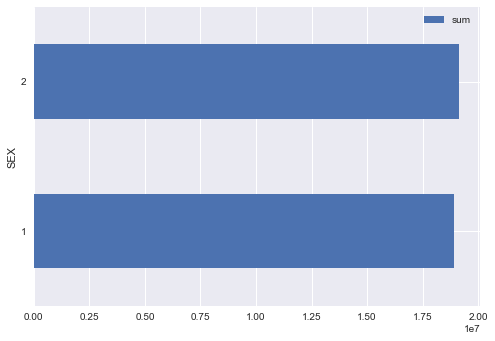

In [9]:
pop_by_gender.plot(kind='barh')

## Let's do a little filtering
We want to keep just the Bay Area records for now. So what geographic identifiers do we have in the PUMS files?

In [8]:
bayareafips ={'001':'Alameda', '013':'Contra Costa', '041':'Marin', '055':'Napa', '075':'San Francisco', '081':'San Mateo', '085':'Santa Clara', '095':'Sonoma', '097':'Solano'}
bayareafips.keys()

dict_keys(['085', '013', '055', '041', '001', '097', '075', '081', '095'])

In [10]:
pums_p.PUMA.unique().shape

(265,)

(Incidentally, since there are 265 PUMA areas in the Bay Area, it means they easily satisfy the 100,000 population per PUMA area required for the Census confidentiality conditions)

To know which PUMAS are in which counties, we need to get a [correspondence](http://www2.census.gov/geo/tiger/GENZ2013/cb_2013_06_puma10_500k.zip). Or we can cheat--SF PUMAS provided below.

In [11]:
sfPUMAS = [k for k in range(7501,7508)]
sfPUMAS

[7501, 7502, 7503, 7504, 7505, 7506, 7507]

In [13]:
pums_p_sf=pums_p.loc[pums_p.PUMA.isin(sfPUMAS)]
pums_p_sf.shape

(7311, 286)

In [14]:
pums_h_sf=pums_h.loc[pums_h.PUMA.isin(sfPUMAS)]
pums_h_sf.shape

(3586, 206)

Down to several thousand records now. How many records in each PUMA?

In [15]:
## records per puma
pums_p_sf.groupby(['PUMA'])['PWGTP'].agg(['size'])

,size
PUMA,
7501,1231
7502,896
7503,971
7504,955
7505,969
7506,1063
7507,1226


What is the 2012 population of San Francisco based on these data?

In [16]:
sf_pop = pums_p_sf.PWGTP.sum()
sf_pop

824855

# Processing and recoding stuff
Data comes with numeric codes. Let's assign labels to a few as well as create some dummies.

### make convenience wrapper for assigning labels from dictionary to codes in data files
PUMS variables are not exposed in the census API (yet, at least). Instead, grab variable labels--pasted directly from PDF [data dictionary](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict12.pdf).

Wrapper here reads the pasted strings, cleans them a bit and tries to stuff into a dictionary.

In [17]:
def map_value_labels(codes_pasted):
    code = []
    for item in codes_pasted.strip('\n').replace(' .',',').split('\n'):
        id = int(item.split(',')[0])
        val = item.split(',')[1]
        code.append([id,val])
    return dict(code)

def assign_value_labels(df,value_map,var):
    target = var+'L'
    if target in df.columns:
        df[target].replace(df[var].map(value_map))
    else:
        df[target] = df[var].map(value_map)
    print(df[target].value_counts())

### Applying the value label wrappers / mappers
Paste the codes, store in a variable as a string.

In [46]:
codessex ="""
1 .Male
2 .Female
"""

In [18]:
## we ship the blank category here--Ideally fix, but currently most vars are loaded as integers, so 'bb' won't work here
## RACE
## note that these are not actually verbatim categories from the code book. Instead, this collapses categories.
codesrace ="""
1 .White
2 .Black
3 .Other
4 .Other
5 .Other
6 .Asian
7 .Other
8 .Other
9 .Two + Races
"""

In [19]:
## TENURE
codesten="""
1 .Owned with mortgage or loan (include home equity loans)
2 .Owned free and clear
3 .Rented
4 .Occupied without payment of rent
"""

In [20]:
## YEAR BUILT
codeybl="""
01 .1939 or earlier
02 .1940 to 1959
03 .1940 to 1959
04 .1960 to 1979
05 .1960 to 1979
06 .1980 to 1999
07 .1980 to 1999
08 .2000 to 2011
09 .2000 to 2011
10 .2000 to 2011
11 .2000 to 2011
12 .2000 to 2011
13 .2000 to 2011
14 .2000 to 2011
15 .2000 to 2011
"""

In [21]:
## YEAR MOVED INTO UNIT
codemovein="""
1 .12 months or less
2 .13 to 23 months
3 .2 to 4 years
4 .5 to 9 years
5 .10 to 19 years
6 .20 to 29 years
7 .30 years or more
"""

Then, grab those strings, and call the two wrapper functions
 2. `race_value_map` in the example below stores the mapping dictionary
 3. `assign_value_labels` applies those value labels to the passed dataframe in the source variable name, with an `_l` (for label) appended.

In [47]:
var = 'SEX'
value_map = map_value_labels(codessex)
assign_value_labels(pums_p,value_map,var) 

Female    186615
Male      181432
Name: SEXL, dtype: int64


In [22]:
var = 'RAC1P'
value_map = map_value_labels(codesrace)
assign_value_labels(pums_p,value_map,var) 

White          233425
Asian           51761
Other           46025
Black           20146
Two + Races     16690
Name: RAC1PL, dtype: int64


In [23]:
var = 'MV'
value_map = map_value_labels(codemovein)
assign_value_labels(pums_h,value_map,var) 

5 to 9 years         30248
10 to 19 years       28520
2 to 4 years         23960
12 months or less    16910
13 to 23 months      16562
30 years or more     15107
20 to 29 years       13988
Name: MVL, dtype: int64


In [24]:
var = 'TEN'
value_map = map_value_labels(codesten)
assign_value_labels(pums_h,value_map,var) 

Owned with mortgage or loan (include home equity loans)    55072
Rented                                                     49868
Owned free and clear                                       22270
Occupied without payment of rent                            2044
Name: TENL, dtype: int64


In [25]:
var = 'YBL'
value_map = map_value_labels(codeybl)
assign_value_labels(pums_h,value_map,var)  

1960 to 1979       43970
1980 to 1999       34802
1940 to 1959       29456
2000 to 2011       15354
1939 or earlier    13446
Name: YBLL, dtype: int64


In [29]:
## Bedrooms
def brclassifier(val):
    if val < 1: return "Studio"
    elif val <=1: return "1 bedroom"
    elif val <=2: return "2 bedrooms"
    #elif val <=3: return "3 bedrooms"
    #elif val <=4: return "4 bedrooms"
    elif val >=3: return "3 or more bedrooms"
pums_h['BDSP_l']=pums_h.BDSP.apply(lambda x: brclassifier(x))
pums_h.BDSP_l.value_counts()

3 or more bedrooms    78247
2 bedrooms            36841
1 bedroom             18010
Studio                 3976
Name: BDSP_l, dtype: int64

In [30]:
def age_mapping_dyn(x):
    ## ordinal var
    breaks = [0,18,34,59,79,99]

    ## given the breaks above, what is the interval between each?
    diff=[breaks[i+1]-breaks[i] for i in range(len(breaks)-1)]
    
    ## make tuples of breaks and distance--we need this to generate a list of age ranges
    joint = zip(breaks,diff)
    l=['%s-%s'%(yr[0],yr[0]+yr[1]-1) for yr in joint]
    
    # Which bin in breaks does the age fall in?
    cnt=0
    for k in breaks:
        #print k
        if x<k:
            break
        else:
            cnt+=1
    index = 0 if cnt==0 else cnt-1
    
    ## the bin id is then used to select the appropriate age range
    return l[index]

age_mapping_dyn(67)

'59-78'

In [32]:
pums_p['AGEPL']=pums_p.AGEP.map(age_mapping_dyn)
pums_p.AGEPL.head()

0    59-78
1    59-78
2    79-98
3    34-58
4    34-58
Name: AGEPL, dtype: object

In [33]:
pums_p.AGEPL.value_counts()

34-58    124688
0-17      83553
18-33     78013
59-78     64487
79-98     17306
Name: AGEPL, dtype: int64

## Let's create a new dummy for movers
First, we create a new variable, called newcomer, referring to folks who moved to SF during the past year. The relevant variable is `MIGPUMA`. How does it work? There are lots of missing values--most folks do not move during a given year.

(Codes differ from PUMA designations, as it happens. Refer to [code list](http://www2.census.gov/programs-surveys/acs/tech_docs/code_lists/2012_ACS_Code_Lists.pdf) here:)

In [34]:
pums_p['MIGPUMA'].dtypes

dtype('float64')

In [35]:
pums_p.MIGPUMA.value_counts().head(8)

3700.0    11612
7300.0     3520
5900.0     3235
6500.0     2696
1.0        2367
7100.0     2236
100.0      2235
6700.0     2141
Name: MIGPUMA, dtype: int64

In [65]:
pums_p['newcomer'], pums_h['newcomer']=0,0
pums_p.loc[(pums_p.MIGPUMA!=7500)&(pums_p.MIGPUMA>0),['newcomer']]=1
pums_p['newcomer']=pums_p['newcomer'].map({0:'existing resident',1:'new resident'})
pums_p['newcomer'].value_counts()

existing resident    317362
new resident          50685
Name: newcomer, dtype: int64

## Now we can study our population with respect to other characteristics


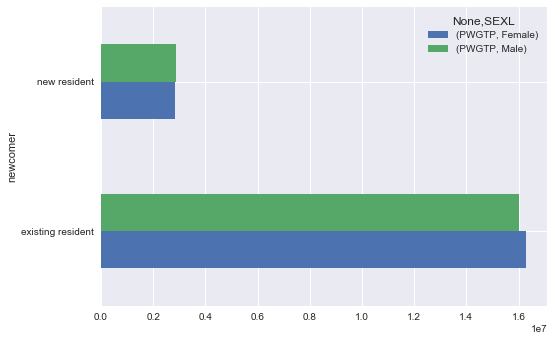

In [48]:
pums_p.loc[:,['newcomer','SEXL','PWGTP']].groupby(['newcomer','SEXL']).sum().unstack().plot(kind='barh')

Let's add some age information to movers, picking arbitrary age breaks for categorization. How do recent arrivals compare to current residents on their age profile?

In [39]:
pums_p.loc[:,['newcomer','AGEPL','PWGTP']].groupby(['newcomer','AGEPL']).sum()

PWGTP
newcomer          AGEPL          
existing resident 0-17    7882541
                  18-33   6709605
                  34-58  11216011
                  59-78   5187931
                  79-98   1319422
new resident      0-17    1347003
                  18-33   2263351
                  34-58   1622568
                  59-78    390474
                  79-98    102524

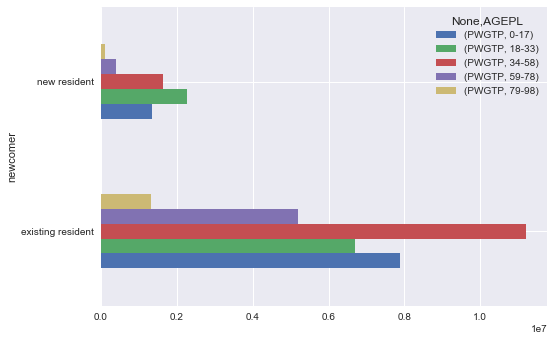

In [40]:
pums_p.loc[:,['newcomer','AGEPL','PWGTP']].groupby(['newcomer','AGEPL']).sum().unstack().plot(kind='barh')

How do recent arrivals compare to current residents in racial profile?

In [42]:
new_by_race = pums_p.loc[:,['newcomer','RAC1PL','PWGTP']].groupby(['newcomer','RAC1PL']).sum()
new_by_race

PWGTP
newcomer          RAC1PL               
existing resident Asian         4388282
                  Black         1846543
                  Other         4475976
                  Two + Races   1388573
                  White        20216136
new resident      Asian          738948
                  Black          422679
                  Other          863996
                  Two + Races    303564
                  White         3396733

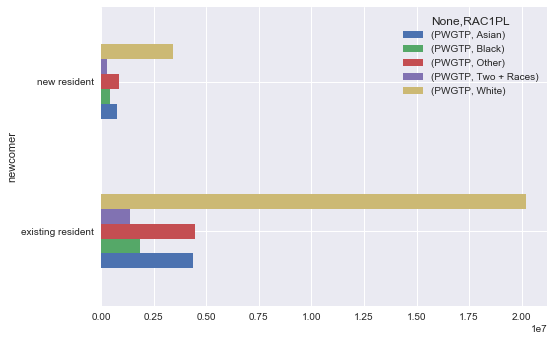

In [43]:
new_by_race.unstack().plot(kind='barh')

## Bridge housing, person universes

Now we use `MIGPUMA` on the *person* table to determine a newcomer *household* (filtering on selected pums_p.SERIALNO values). All handshakes make use of this variable. 

Notice the nesting of `pums_p` criteria inside a `pums_h` call.

In [68]:
pums_h['newcomer'] = 0
pums_h.loc[pums_p.loc[(pums_p.MIGPUMA!=7500)&(pums_p.MIGPUMA>0),'SERIALNO'].tolist(),'newcomer']=1

pums_h['recent']=pums_h['newcomer'].map({0:'existing resident',1:'new resident'})
pums_h.recent.value_counts()

existing resident    125077
new resident          28038
Name: recent, dtype: int64

Let's look at how recent arrival households compare to existing resident households in terms of the vintage of housing they live in.

WGTP
recent            YBLL                    
existing resident 1939 or earlier  1125958
                  1940 to 1959     2399213
                  1960 to 1979     3618134
                  1980 to 1999     2951629
                  2000 to 2011     1391347
new resident      1939 or earlier   181456
                  1940 to 1959      371722
                  1960 to 1979      712846
                  1980 to 1999      608062
                  2000 to 2011      342896

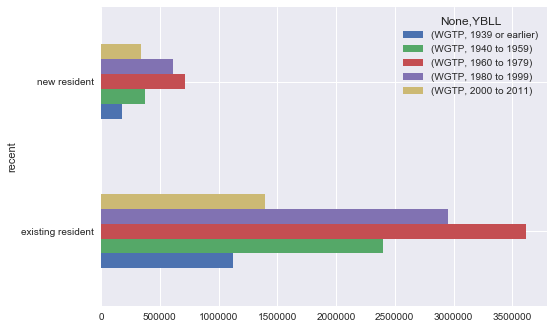

In [69]:
hsg_by_bltyr = pums_h.loc[:,['recent','YBLL','WGTP']].groupby(['recent','YBLL']).sum()
hsg_by_bltyr.unstack().plot(kind='barh')
hsg_by_bltyr

## Your Turn: Back to Rental Data

Let's get some additional practice with groupby operations, using our rental listings data.

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
rents = pd.read_csv('data/rent_bay_filtered.csv').dropna()

In [72]:
for name in rents.columns:
    print(name+',',)

Unnamed: 0,
neighborhood,
title,
price,
bedrooms,
pid,
longitude,
subregion,
link,
latitude,
sqft,
month,
day,
year,
blockfips,
countyfips,
county_x,
tractfips,
logrecno,
fipsblock,
state,
county_y,
tract,
blkgrp,
block,
arealand,
P0010001,
H00010001,
outlier,
view,
walk,


Generate a groupby object called 'grouped' grouping on county_x

In [104]:
gr = rents.groupby('county_x')

Now compute the mean price for each county_x

In [105]:
mean_prices = gr['price'].mean()

Plot this as a bar chart

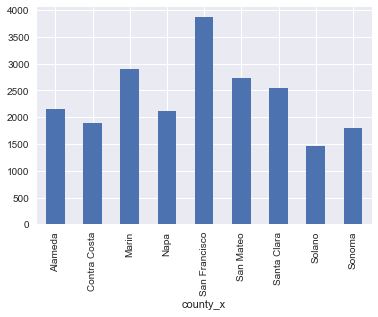

In [106]:
mean_prices.plot(kind='bar')

Compute the maximum price per county_x

In [107]:
max_prices = gr['price'].max()

Plot this as a horizontal bar chart

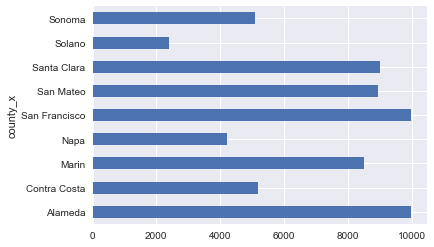

In [108]:
max_prices.plot(kind='barh')

Compute a groupby object using county, and within county_x, by number of bedrooms.

In [109]:
gr2 = rents.groupby(['county_x', 'bedrooms'])

Compute the mean price and sqft in each groupby value (county_x and bedroom)

In [110]:
means = gr2[['price', 'sqft']].mean()

Use the 'unstack' method to present the results as a two-dimensional table

In [111]:
means = means.unstack()

Plot this as a horizontal bar chart (increase figsize to 10,10 to make this legible)

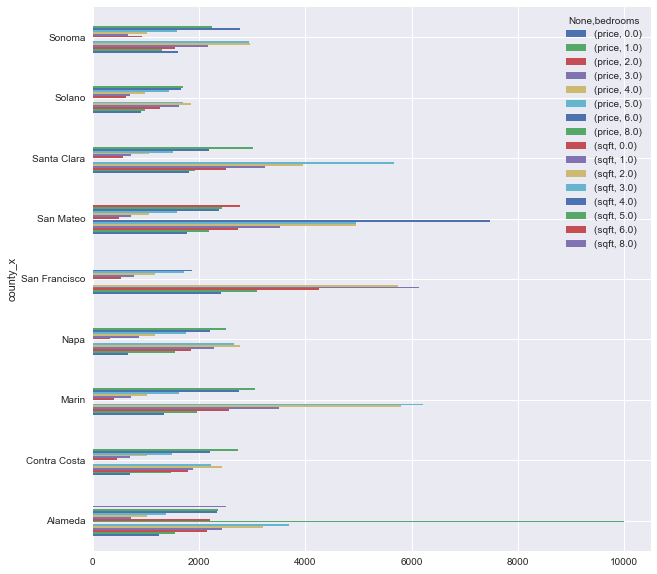

In [112]:
means.plot(kind='barh', edgecolor='None', figsize=(10,10))

Do the same tabulation (no plot), but presenting the 10th percentile values instead of means

In [113]:
gr2[['price', 'sqft']].quantile(0.9)

0.9                      price    sqft
county_x      bedrooms                
Alameda       0.0       1510.8  7500.0
              1.0       1855.0   840.0
              2.0       2929.0  1214.0
              3.0       3191.4  1791.7
              4.0       3565.0  2873.2
              5.0       5197.0  3440.0
              8.0       9995.0  2500.0
Contra Costa  0.0        695.0   450.0
              1.0       1861.8   810.4
              2.0       2384.4  1254.8
              3.0       2503.5  1849.0
              4.0       3437.0  2757.8
              5.0       2583.5  3319.5
Marin         0.0       1495.0   460.0
              1.0       2514.0   884.0
              2.0       3620.0  1205.0
              3.0       4950.0  2028.0
              4.0       7950.0  3397.0
              5.0       8120.0  3460.0
Napa          0.0        668.0   366.4
              1.0       2160.0  1100.0
              2.0       2250.0  1579.5
              3.0       2840.0  2400.0
              4.0       3060.0  2760.0
              5.0       2650.0  2502.0
San Francisco 0.0       3124.0   589.5
              1.0       3900.0  1000.0
              2.0       5995.0  1500.0
              3.0       9375.0  2350.0
              4.0       8345.0  2300.0
San Mateo     0.0       2183.0   600.0
              1.0       2711.0   850.0
              2.0       3293.0  1250.0
              3.0       4643.4  1950.0
              4.0       8000.0  3000.0
              5.0       6950.0  2805.0
              6.0       7475.0  2770.0
Santa Clara   0.0       2675.0   622.8
              1.0       2361.5   860.3
              2.0       3292.8  1215.6
              3.0       4840.0  1896.4
              4.0       5810.0  2918.7
              5.0       7500.0  3535.0
Solano        0.0       1215.4   816.0
              1.0       1248.0   792.0
              2.0       1539.5  1167.2
              3.0       1868.0  1704.8
              4.0       2256.0  1997.2
              5.0       1938.5  1816.4
Sonoma        0.0       2245.0  1430.0
              1.0       1485.2   851.8
              2.0       1896.6  1367.5
              3.0       2840.0  2035.8
              4.0       4680.0  5134.0
              5.0       3210.0  2576.1

Do the same, but use describe to get the full statistical profile 

In [114]:
gr2[['price', 'sqft']].describe()

price                                             \
                        count         mean          std     min      25%   
county_x      bedrooms                                                     
Alameda       0.0         8.0  1253.875000   325.730141   650.0  1087.50   
              1.0        47.0  1544.297872   277.325418   825.0  1387.50   
              2.0        76.0  2160.250000   683.561616  1164.0  1837.50   
              3.0        40.0  2424.900000   592.837497  1150.0  2087.25   
              4.0        10.0  3197.500000   398.338563  2800.0  3000.00   
              5.0         5.0  3689.000000  1414.118100  2500.0  2700.00   
              8.0         1.0  9995.000000          NaN  9995.0  9995.00   
Contra Costa  0.0         1.0   695.000000          NaN   695.0   695.00   
              1.0        28.0  1465.428571   378.384620   795.0  1247.50   
              2.0        45.0  1787.666667   489.008598   795.0  1425.00   
              3.0        24.0  1881.000000   428.841310  1245.0  1650.00   
              4.0        28.0  2427.500000   870.420822  1595.0  1890.00   
              5.0         8.0  2218.125000   324.674975  1900.0  2000.00   
Marin         0.0         9.0  1334.444444   138.416140  1125.0  1195.00   
              1.0        39.0  1956.358974   488.900242   975.0  1695.00   
              2.0        50.0  2563.340000   629.862784  1665.0  2100.00   
              3.0        31.0  3507.548387  1246.130460  1671.0  2700.00   
              4.0        11.0  5800.000000  1701.029100  3000.0  4575.00   
              5.0         5.0  6220.000000  1797.776404  4200.0  5000.00   
Napa          0.0         2.0   668.000000     0.000000   668.0   668.00   
              1.0         5.0  1550.600000   547.732873  1015.0  1199.00   
              2.0        14.0  1857.500000   378.314836  1295.0  1547.50   
              3.0        18.0  2277.777778   647.897555  1400.0  1887.50   
              4.0         9.0  2766.666667   531.507291  2250.0  2500.00   
              5.0         1.0  2650.000000          NaN  2650.0  2650.00   
San Francisco 0.0        38.0  2407.842105   760.625330  1000.0  2018.75   
              1.0       110.0  3100.772727   795.718897   850.0  2721.25   
              2.0        91.0  4252.824176  1270.897571  1800.0  3500.00   
              3.0        36.0  6141.361111  2198.891372  3000.0  4843.75   
              4.0        12.0  5740.833333  1917.243326  3500.0  4423.75   
San Mateo     0.0        21.0  1768.000000   354.834891   995.0  1490.00   
              1.0       131.0  2189.694656   420.669172  1250.0  1936.50   
              2.0       168.0  2729.851190   482.890420  1877.0  2393.00   
              3.0        49.0  3529.795918   866.515171  1500.0  3000.00   
              4.0        18.0  4953.611111  1735.069761  3500.0  3825.00   
              5.0         4.0  4949.750000  2076.238646  3500.0  3724.25   
              6.0         1.0  7475.000000          NaN  7475.0  7475.00   
Santa Clara   0.0        17.0  1820.941176   548.683933  1150.0  1295.00   
              1.0       188.0  1934.521277   417.776115   925.0  1650.00   
              2.0       222.0  2514.918919   627.283126  1250.0  2096.25   
              3.0        82.0  3236.292683   918.608334  1100.0  2591.25   
              4.0        28.0  3952.142857  1654.920513  2450.0  2950.00   
              5.0        11.0  5659.090909  1720.293315  3000.0  4350.00   
Solano        0.0         3.0   904.333333   377.433879   650.0   687.50   
              1.0        15.0   993.800000   202.676096   715.0   800.50   
              2.0        28.0  1262.571429   250.698052   895.0  1048.00   
              3.0        39.0  1632.179487   252.796972  1150.0  1505.00   
              4.0        19.0  1846.842105   305.819530  1250.0  1710.00   
              5.0         2.0  1692.500000   434.870670  1385.0  1538.75   
Sonoma        0.0         4.0  1612.500000   642.099421  1050.0  1200.00

Do the same, presenting the count of how many nonmissing price values there are in each group

In [115]:
gr2[['price', 'sqft']].count()

price  sqft
county_x      bedrooms             
Alameda       0.0           8     8
              1.0          47    47
              2.0          76    76
              3.0          40    40
              4.0          10    10
              5.0           5     5
              8.0           1     1
Contra Costa  0.0           1     1
              1.0          28    28
              2.0          45    45
              3.0          24    24
              4.0          28    28
              5.0           8     8
Marin         0.0           9     9
              1.0          39    39
              2.0          50    50
              3.0          31    31
              4.0          11    11
              5.0           5     5
Napa          0.0           2     2
              1.0           5     5
              2.0          14    14
              3.0          18    18
              4.0           9     9
              5.0           1     1
San Francisco 0.0          38    38
              1.0         110   110
              2.0          91    91
              3.0          36    36
              4.0          12    12
San Mateo     0.0          21    21
              1.0         131   131
              2.0         168   168
              3.0          49    49
              4.0          18    18
              5.0           4     4
              6.0           1     1
Santa Clara   0.0          17    17
              1.0         188   188
              2.0         222   222
              3.0          82    82
              4.0          28    28
              5.0          11    11
Solano        0.0           3     3
              1.0          15    15
              2.0          28    28
              3.0          39    39
              4.0          19    19
              5.0           2     2
Sonoma        0.0           4     4
              1.0          35    35
              2.0          62    62
              3.0          37    37
              4.0          14    14
              5.0           4     4

Define a function called 'q75_q25' that computes the difference between the 75th percentile and the 25th percentile, and analyze this value in the groupby

In [116]:
def q75_q25(x):
    return x.quantile(0.75)-x.quantile(0.25)

In [117]:
gr2.agg(q75_q25)

H00010001  P0010001  Unnamed: 0     arealand  blkgrp  \
county_x      bedrooms                                                         
Alameda       0.0           68.50    160.75      206.25      3875.75    1.25   
              1.0          203.50    477.00      313.50     80951.00    1.00   
              2.0          182.25    450.00      374.00     66438.75    2.00   
              3.0           74.50    162.25      316.25     89642.75    2.00   
              4.0           57.50    236.25      108.75   1122543.50    1.00   
              5.0           25.00     32.00      259.00       674.00    1.00   
              8.0            0.00      0.00        0.00         0.00    0.00   
Contra Costa  0.0            0.00      0.00        0.00         0.00    0.00   
              1.0          224.50    381.75      455.00    103756.50    2.00   
              2.0          189.00    336.00      385.00    105835.00    2.00   
              3.0          114.25    301.00      371.00    100900.00    2.00   
              4.0           62.00    167.25      427.75     80769.00    2.00   
              5.0           40.00    152.75      413.25     92070.50    1.25   
Marin         0.0           29.00    123.00      309.00    178239.00    2.00   
              1.0          196.50    167.00      282.50    214368.00    1.00   
              2.0          169.00    309.25      424.00    273517.75    1.00   
              3.0           96.50    316.50      417.50    217281.00    1.50   
              4.0           38.00     69.00      387.50    378416.00    1.50   
              5.0          516.00   1031.00      284.00   1390271.00    2.00   
Napa          0.0            0.00      0.00        0.50         0.00    0.00   
              1.0           10.00      0.00      316.00  30019538.00    1.00   
              2.0           71.50    206.00      204.75     24564.00    2.00   
              3.0           66.00    143.25      387.50   1316652.50    0.75   
              4.0          108.00    245.00       87.00    202302.00    2.00   
              5.0            0.00      0.00        0.00         0.00    0.00   
San Francisco 0.0          331.75    417.00      251.50      4418.00    1.00   
              1.0          240.50    346.00      328.50     12857.50    1.00   
              2.0          137.50    250.00      420.00      8035.50    2.00   
              3.0           79.75    188.25      512.00      6635.25    1.00   
              4.0           65.25     80.25      428.50      4508.25    3.00   
San Mateo     0.0          145.00    236.00      197.00     33686.00    4.00   
              1.0          196.00    357.00      299.00    107714.50    2.00   
              2.0          166.50    325.50      293.50     79144.75    2.00   
              3.0           83.00    200.00      506.00     66796.00    2.00   
              4.0           37.25    111.75      162.00    114244.75    1.75   
              5.0           78.50    285.25       30.25    488784.00    0.25   
              6.0            0.00      0.00        0.00         0.00    0.00   
Santa Clara   0.0          116.00    208.00     1534.00     19217.00    2.00   
              1.0          197.75    400.25      790.75     66853.00    2.00   
              2.0          175.75    385.75      563.00     74347.25    2.00   
              3.0           94.50    328.75      579.50     48872.75    2.00   
              4.0           70.50    148.00      551.00     89766.25    2.00   
              5.0           75.50    172.00     1438.00    414410.50    2.00   
Solano        0.0           48.00    140.00      137.00     56334.00    0.50   
              1.0           95.50    275.00      297.50     44846.00    0.50   
              2.0           86.00    169.25      257.75     41409.00    1.00   
              3.0           21.00     84.00      294.50     39584.00    1.00   
              4.0           39.50    105.00      336.50     34231.50    1.00   
              5.0       

Create a list of functions to apply, using min, median, max, and q75_q25 for price and sqft by county_x, and bedrooms

In [118]:
f = ['min', 'median', 'max', q75_q25]
gr2.agg(f)

Unnamed: 0                          price          \
                              min  median   max  q75_q25     min  median   
county_x      bedrooms                                                     
Alameda       0.0            1419  1504.5  1893   206.25   650.0  1397.5   
              1.0            1141  1591.0  2146   313.50   825.0  1575.0   
              2.0            1030  1567.0  2149   374.00  1164.0  2000.0   
              3.0            1009  1594.5  2020   316.25  1150.0  2350.0   
              4.0            1034  1685.5  1965   108.75  2800.0  3000.0   
              5.0            1184  1491.0  2015   259.00  2500.0  3250.0   
              8.0            1278  1278.0  1278     0.00  9995.0  9995.0   
Contra Costa  0.0            1436  1436.0  1436     0.00   695.0   695.0   
              1.0            1007  1442.5  2005   455.00   795.0  1591.5   
              2.0            1008  1544.0  2014   385.00   795.0  1850.0   
              3.0            1035  1543.5  2076   371.00  1245.0  1772.5   
              4.0            1011  1578.5  2147   427.75  1595.0  2045.0   
              5.0            1291  1567.0  1895   413.25  1900.0  2125.0   
Marin         0.0            1784  2054.0  2366   309.00  1125.0  1400.0   
              1.0            1795  2033.0  2722   282.50   975.0  1862.0   
              2.0            1741  2196.5  2726   424.00  1665.0  2335.5   
              3.0            1742  2299.0  2724   417.50  1671.0  3290.0   
              4.0            1979  2330.0  2867   387.50  3000.0  5850.0   
              5.0            1792  2171.0  2633   284.00  4200.0  5700.0   
Napa          0.0            1922  1922.5  1923     0.50   668.0   668.0   
              1.0            1856  2121.0  2344   316.00  1015.0  1289.0   
              2.0            1739  2173.0  2380   204.75  1295.0  1835.0   
              3.0            1855  2109.5  2634   387.50  1400.0  2150.0   
              4.0            1930  2288.0  2368    87.00  2250.0  2650.0   
              5.0            2376  2376.0  2376     0.00  2650.0  2650.0   
San Francisco 0.0              26   191.5  1150   251.50  1000.0  2486.0   
              1.0               7   371.5  1229   328.50   850.0  3027.0   
              2.0               8   478.0  1148   420.00  1800.0  4200.0   
              3.0              39   380.0   930   512.00  3000.0  5200.0   
              4.0              82   532.5  1227   428.50  3500.0  5450.0   
San Mateo     0.0              58  2780.0  2949   197.00   995.0  1800.0   
              1.0              56  2693.0  3087   299.00  1250.0  2150.0   
              2.0            1249  2700.0  3086   293.50  1877.0  2700.0   
              3.0              64  2729.0  3082   506.00  1500.0  3400.0   
              4.0              74  2919.5  3081   162.00  3500.0  4085.0   
              5.0            2947  2995.5  3059    30.25  3500.0  4149.5   
              6.0            2809  2809.0  2809     0.00  7475.0  7475.0   
Santa Clara   0.0             914  1336.0  3015  1534.00  1150.0  1825.0   
              1.0             548  1074.0  3046   790.75   925.0  1895.0   
              2.0             552   994.0  3079   563.00  1250.0  2395.0   
              3.0             566  1131.5  3075   579.50  1100.0  3190.0   
              4.0             575  1029.5  3072   551.00  2450.0  3400.0   
              5.0             676  1617.0  3051  1438.00  3000.0  6100.0   
Solano        0.0            1402  1433.0  1676   137.00   650.0   725.0   
              1.0            1135  1659.0  2009   297.50   715.0   985.0   
              2.0            1130  1578.0  2070   257.75   895.0  1270.0   
              3.0            1010  1301.0  2072   294.50  1150.0  1695.0   
              4.0            1017  1609.0  2150   336.50  1250.0  1800.0   
              5.0            1274  1292.0  1310    18.00  1385.0  1692.5   
Sonoma        0.0            2101  2239.0  2341    85.50  1050.0  1450.

Use the pivot_table syntax to create a table of max prices by county_x by bedrooms

In [ ]:
rents.pivot_table(index='county_x', columns='bedrooms', values='price')